# 6.5 Unsupervised Machine Learning - Clustering

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # importing the k-means algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [2]:
# generated graphs displayed automatically within the notebook

%matplotlib inline

In [3]:
# Creating path
path = r'C:\Users\ZenBook\Heart Attack Risk Prediction Dataset'

# Importing dataset
df = pd.read_csv(os.path.join(path,'02 Data Profile', 'heart_attack_prediction_dataset_cleaned.csv'))

In [4]:
df.shape

(8763, 26)

In [5]:
df.head()

,Patient ID,Age,Gender,Cholesterol Level,Blood Pressure,Heart Rate,Diabetes,Family Heart Problems,Smoking,Obesity,...,Sedentary Hours Per Day,Income,Body Mass Index,Triglyceride Levels,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [6]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Cholesterol Level', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family Heart Problems', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'Body Mass Index',
       'Triglyceride Levels', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk'],
      dtype='object')

In [7]:
# create a subset including columns with only numerical values
df_subset = df[['Age', 'Cholesterol Level',
       'Heart Rate', 'Exercise Hours Per Week','Stress Level',
       'Sedentary Hours Per Day', 'Income', 'Body Mass Index',
       'Triglyceride Levels', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day','Heart Attack Risk']]

In [8]:
# use subset with random 1500 rows only that ensures reproducibility
df_sampled = df_subset.sample(n=1500, random_state=42)

In [9]:
# check subset
df_sampled.shape

(1500, 12)

In [10]:
df_sampled.head()

,Age,Cholesterol Level,Heart Rate,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,Income,Body Mass Index,Triglyceride Levels,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
1226,65,340,75,9.870784,7,5.567363,216664,35.561283,315,0,4,0
7903,77,361,46,2.763339,5,9.964626,221778,26.638707,471,3,6,1
1559,70,341,73,16.325463,6,9.151772,197984,23.927789,104,1,8,1
3621,47,392,72,5.161941,8,8.435153,88566,29.480917,201,6,9,1
7552,63,173,98,3.681472,1,8.841575,148437,21.110044,638,2,7,0


## 2.The elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [12]:
# creates a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_sampled).score(df_sampled) for i in range(len(kmeans))]

#Check to see scores
score

[-9345224465635.953,
 -2514131936529.653,
 -1046667703423.0374,
 -623112968597.692,
 -384987913256.60443,
 -258500974296.50427,
 -195474992804.3879,
 -151187567892.4243,
 -126942804614.09091]

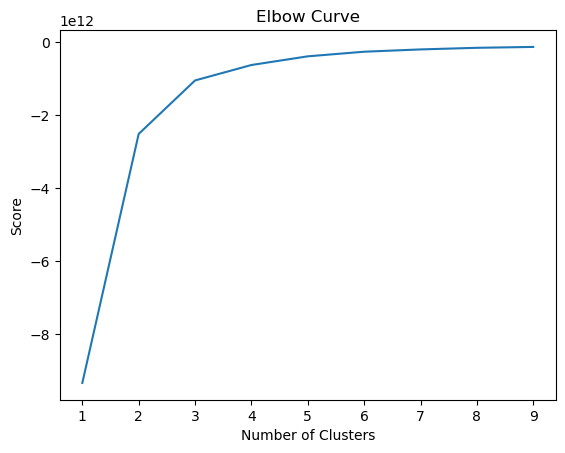

In [13]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal count of clusters are 3, because the elbow, or the breaking point of the curve, begins to flatten out from two to three on the x-axis.

## 3. k-means clustering

In [14]:
# create the k-means object

kmeans = KMeans(n_clusters = 3)

In [15]:
# fit the k-means object to the data_set

kmeans.fit(df_sampled)

KMeans(n_clusters=3)

## 4. Attaching a new column to your dataframe with the resulting clusters

In [16]:
df_sampled['Clusters'] = kmeans.fit_predict(df_sampled)

In [17]:
df_sampled.head()

,Age,Cholesterol Level,Heart Rate,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,Income,Body Mass Index,Triglyceride Levels,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Clusters
1226,65,340,75,9.870784,7,5.567363,216664,35.561283,315,0,4,0,1
7903,77,361,46,2.763339,5,9.964626,221778,26.638707,471,3,6,1,1
1559,70,341,73,16.325463,6,9.151772,197984,23.927789,104,1,8,1,0
3621,47,392,72,5.161941,8,8.435153,88566,29.480917,201,6,9,1,2
7552,63,173,98,3.681472,1,8.841575,148437,21.110044,638,2,7,0,0


In [18]:
df_sampled['Clusters'].value_counts()

Clusters
0    547
2    482
1    471
Name: count, dtype: int64

## 5. Create a few different visualizations (e.g., scatterplots) using the clustered data

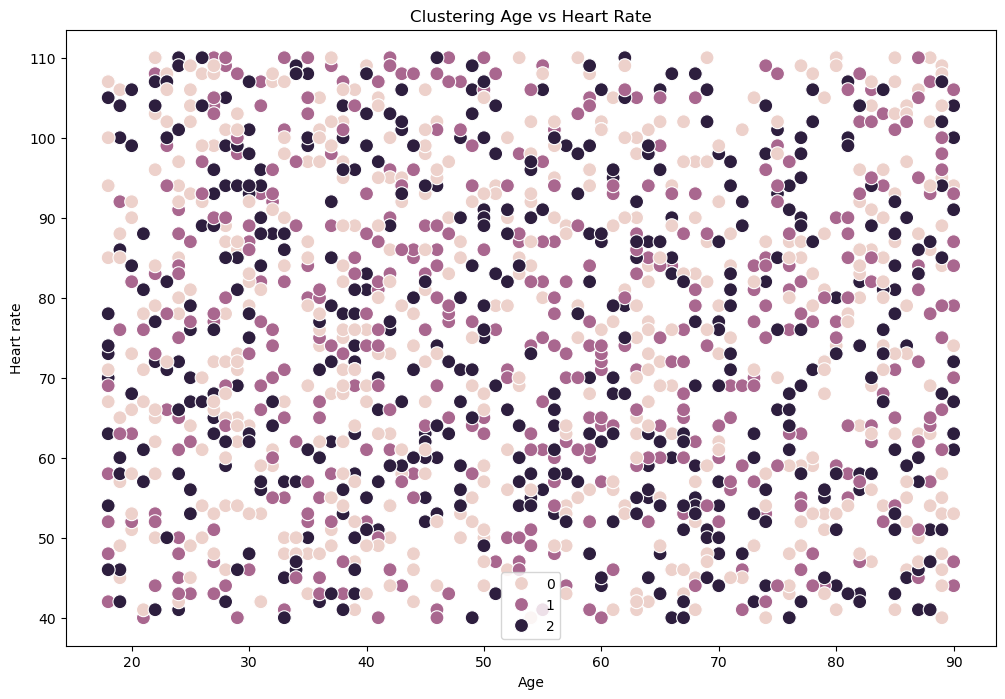

In [19]:
# Plot the clusters for the "Age" and "Heart Rate" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sampled['Age'], y=df_sampled['Heart Rate'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Heart rate') # Label y-axis.
plt.title('Clustering Age vs Heart Rate')
plt.show()

**Interpretations**: While **Age** and **Heart Rate** are physiologically related, the clustering in this plot doesn’t reflect a strong or clean separation. The data points across clusters 0, 1, and 2 are densely packed and show considerable overlap. There’s no clear boundary or distinct grouping that separates one cluster from another. This suggests that k-means may not be capturing distinct groupings in this case. Individuals of similar age have a broad range of heart rates, and vice versa.

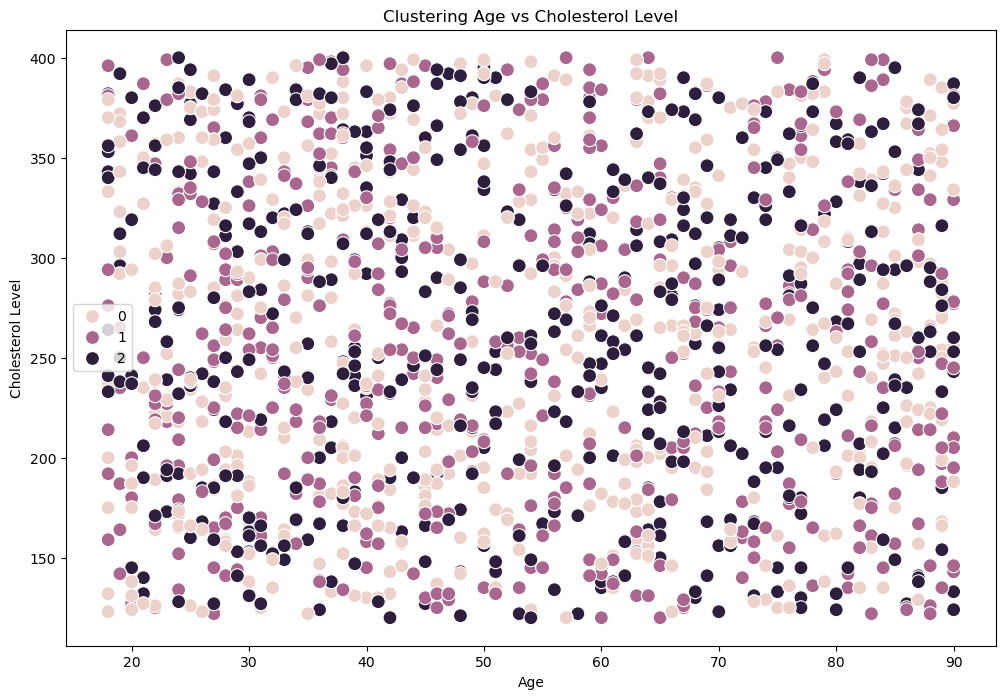

In [20]:
# Plot the clusters for the "Age" and "Cholesterol Level" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sampled['Age'], y=df_sampled['Cholesterol Level'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Cholesterol Level') # Label y-axis.
plt.title('Clustering Age vs Cholesterol Level')
plt.show()

**Interpretation**: While the clustering algorithm has assigned labels to the data, the visual evidence suggests that these clusters do not represent distinct or meaningful groupings. Data points are heavily intermingled, especially in the central region of the plot. Individuals of similar **Age** exhibit a wide range of **Cholesterol Level**, and vice versa. No clear separation is visible between clusters. For example, people aged 50–70 appear in all three clusters with overlapping cholesterol levels. The overlap and density of points across all three clusters imply that the separation is weak, and the clustering may not provide actionable insights without further refinement. 

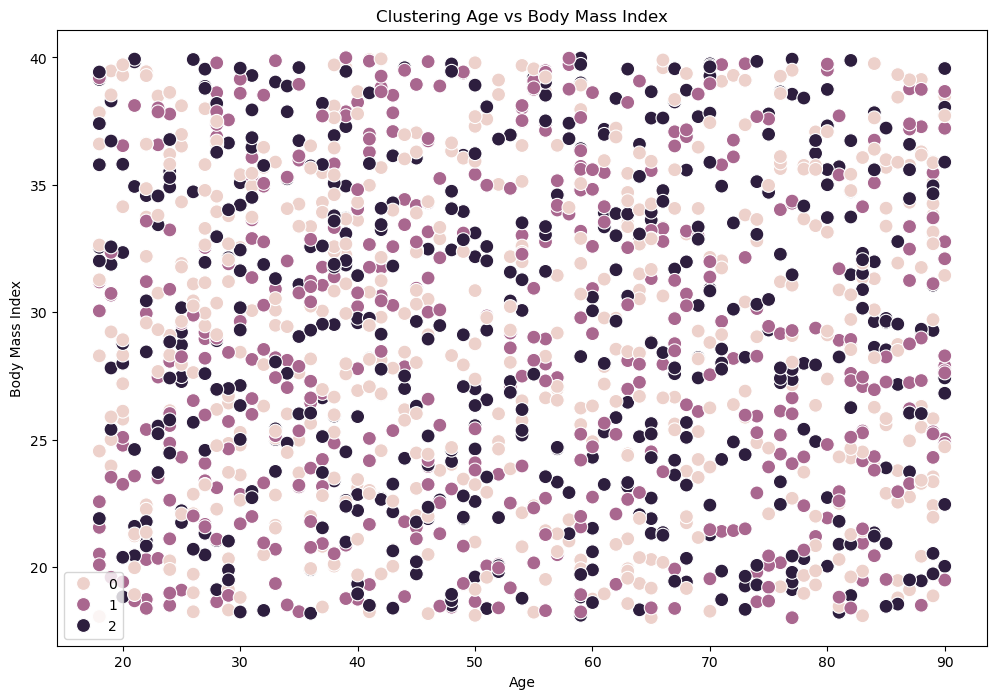

In [21]:
# Plot the clusters for the "Age" and "Body Mass Index" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sampled['Age'], y=df_sampled['Body Mass Index'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Body Mass Index') # Label y-axis.
plt.title('Clustering Age vs Body Mass Index')
plt.show()

**Interpretation**: The clustering in this plot of **Age** vs **Body Mass Index** does not reflect a strong or clean separation. The data points across clusters  are densely packed and show considerable overlap. Data points are heavily intermixed, especially in the central age range (roughly 40–70 years), where individuals from both clusters share similar BMI values. BMI values span a wide range for individuals of similar age.  Here, the clustering may not provide actionable insights without further refinement or dimensionality reduction.

## 6. Calculate the descriptive statistics for the clusters using the groupby() function 

In [23]:
df_sampled.loc[df_sampled['Clusters'] == 2, 'Cluster'] = 'dark purple'
df_sampled.loc[df_sampled['Clusters'] == 1, 'Cluster'] = 'purple'
df_sampled.loc[df_sampled['Clusters'] == 0, 'Cluster'] = 'pink'

In [25]:
df_sampled.groupby('Cluster').agg({'Age':['mean', 'median'], 
                         'Heart Rate':['mean', 'median'], 
                         'Cholesterol Level':['mean', 'median'],
                          'Body Mass Index':['mean', 'median']})

Age        Heart Rate        Cholesterol Level         \
                  mean median       mean median              mean median   
Cluster                                                                    
dark purple  53.715768   53.0  74.622407   74.0        261.224066  257.5   
pink         52.784278   51.0  75.400366   76.0        262.084095  261.0   
purple       52.936306   53.0  75.585987   76.0        256.027601  253.0   

            Body Mass Index             
                       mean     median  
Cluster                                 
dark purple       29.213046  29.299379  
pink              29.194057  29.263261  
purple            28.721189  28.254747

**Interpretation**: 
**Cholesterol Level** is highest in pink (mean appr. 262) and lowest in purple (mean appr.256), suggesting modest metabolic differences between groups. **Heart Rate** is slightly higher in pink and purple (appr. 75–75.6 bpm) compared with dark purple (appr.74.6 bpm). **BMI** is marginally lower in purple (mean appr. 28.7) versus pink and dark purple (appr.29.2).
The close alignment of means and medians across most metrics indicates limited skew and few extreme outliers overall. **Age** and **BMI** show particularly small mean–median gaps, so their distributions within clusters are fairly symmetric. **Cholesterol Level** shows slightly larger mean–median differences in dark purple and purple clusters, hinting at a few higher cholesterol values pulling the mean up modestly. **Heart Rate** differences are minimal, so there’s no evidence of extreme outliers affecting pulse measurements.

## Creation 3D Visualization

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import Delaunay 

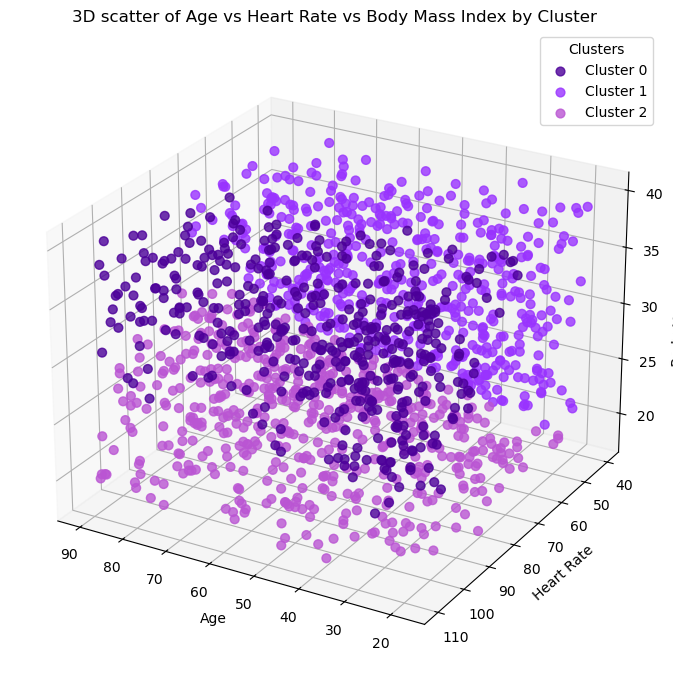

In [27]:
# prepare data (select only the three features)
X = df_sampled[['Age', 'Heart Rate', 'Body Mass Index']].dropna().copy()

# optional: scale features so clustering + axes are comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# fit KMeans (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# save clusters back to df_sampled aligned with X index
df_sampled.loc[X.index, 'Clusters'] = clusters

# plotting
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

# colors and markers
colors = ['#4C0099', '#9933FF', '#BA55D3'] # dark violet; medium violet; light violet
markers = ['o', 'o', 'o']  # circles for all clusters

for c in sorted(df_sampled['Clusters'].unique()):
    mask = df_sampled['Clusters'] == c
    ax.scatter(
        df_sampled.loc[mask, 'Age'],
        df_sampled.loc[mask, 'Heart Rate'],
        df_sampled.loc[mask, 'Body Mass Index'],
        color=colors[int(c) % len(colors)],
        marker=markers[int(c) % len(markers)],
        s=40,
        alpha=0.8,
        label=f'Cluster {int(c)}'
    )

ax.set_xlabel('Age')
ax.set_ylabel('Heart Rate')
ax.set_zlabel('Body Mass Index')
ax.legend(title='Clusters')
ax.view_init(elev=25, azim=120)  # adjust viewpoint
plt.title('3D scatter of Age vs Heart Rate vs Body Mass Index by Cluster')
plt.tight_layout()

plt.show()

**Interpretations**: It was expected that there could be three clusters: 0 - possibly younger individuals with higher heart rate and lower BMI; 1 - middle-aged with moderate BMI and heart rate, 2 - older individuals with higher BMI and lower heart rate. However, because of overlapping, it is hard to distinguish them and talk about some complex effect of Age, Heart Rate and BMI.

**What these results could be useful for in future steps of an analytics pipeline?**
- Feature Engineering: cluster labels can be added as a new categorical feature to enrich predictive models. For example, a model predicting heart attack risk could use cluster membership as a proxy for underlying health profiles.
- Targeted Modeling: for building separate models for each cluster, allowing for more personalized predictions. This is especially useful if the clusters represent distinct subpopulations (e.g., young fit individuals vs. older high-BMI individuals).
- Risk Stratification: clusters help segment the population into low, medium, and high-risk groups, guiding resource allocation, screening priorities, or intervention strategies.
- Outlier Detection: by analyzing cluster boundaries and descriptive statistics, you can identify outliers, individuals who don’t fit typical patterns, which may signal hidden health risks or data quality issues.
- Actionable Insights for Stakeholders: just like real estate agents use clusters to tailor marketing, healthcare providers can use them to design targeted wellness programs, prioritize diagnostics, or personalize treatment plans.